In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

from data_load import Data_load
from Resnet import Resnet50

In [2]:
data = Data_load()

In [3]:
(train, test), _ = data.get_tfds()

데이터 특성 : FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
Train data : 50000
Test data : 10000


In [4]:
IMAGE_SIZE = 32
EPOCHS = 50
BATCH_SIZE = 64
TRAIN_SIZE = int(50000*0.8)

In [5]:
valid = train.skip(TRAIN_SIZE)

In [6]:
train = data.apply_normalize_on_dataset(train,image_size=IMAGE_SIZE, is_train=True, batch_size=BATCH_SIZE)
valid = data.apply_normalize_on_dataset(valid,image_size=IMAGE_SIZE, is_train=False, batch_size=BATCH_SIZE)
test = data.apply_normalize_on_dataset(test,image_size=IMAGE_SIZE, is_train=False, batch_size=BATCH_SIZE)

### ResNet50

In [7]:
resnet50 = Resnet50(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), add_id = True, num_blocks=[3,4,6,3],num_class=10)

In [8]:
resnet50 = resnet50()

모델 생성 완료


TypeError: Input 'y' of 'AddV2' Op has type int64 that does not match type float32 of argument 'x'.

In [ ]:
# resnet50.summary()

In [11]:
# import os
# img_path = os.getenv('HOME') + '/project/GoingDeeper/GD_ResNet/image/model_50.jpg'
# keras.utils.plot_model(resnet50, to_file=img_path, show_shapes=False)

In [12]:
lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1)

In [16]:
resnet50.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, decay=0.0001),
                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=["acc"])

In [17]:
history = resnet50.fit(train,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       validation_data=valid,
                       steps_per_epoch=TRAIN_SIZE//BATCH_SIZE
                    )

Epoch 1/50
625/625 [==============================] - 26s 41ms/step - loss: 1.8510 - acc: 0.3846 - val_loss: 1.6257 - val_acc: 0.4596
Epoch 2/50
625/625 [==============================] - 26s 41ms/step - loss: 1.5442 - acc: 0.4786 - val_loss: 1.3672 - val_acc: 0.5247
Epoch 3/50
625/625 [==============================] - 26s 41ms/step - loss: 1.4099 - acc: 0.5222 - val_loss: 1.2895 - val_acc: 0.5751
Epoch 4/50
625/625 [==============================] - 26s 41ms/step - loss: 1.2858 - acc: 0.5641 - val_loss: 1.1192 - val_acc: 0.6155
Epoch 5/50
625/625 [==============================] - 26s 41ms/step - loss: 1.1927 - acc: 0.5964 - val_loss: 1.3337 - val_acc: 0.6332
Epoch 6/50
625/625 [==============================] - 26s 41ms/step - loss: 1.1132 - acc: 0.6240 - val_loss: 1.0410 - val_acc: 0.6474
Epoch 7/50
625/625 [==============================] - 26s 41ms/step - loss: 1.0433 - acc: 0.6468 - val_loss: 1.1632 - val_acc: 0.6809
Epoch 8/50
625/625 [==============================] - 26s 41ms

In [18]:
resnet50.evaluate(test,batch_size=64,verbose=2)

157/157 - 2s - loss: 1.9477 - acc: 0.6544


[1.9477183818817139, 0.6543999910354614]

### plain ConvNet

In [7]:
plain = Resnet50(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), add_id = False, num_blocks=[3,4,6,3], num_class=10)
plain = plain()

모델 생성 완료


In [8]:
plain.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 64)        9472      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256   

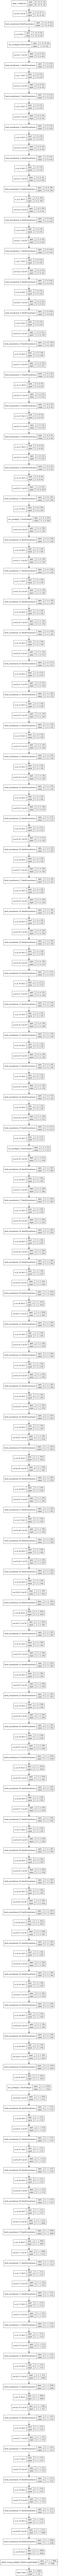

In [9]:
import os
img_path = os.getenv('HOME') + '/project/GoingDeeper/GD_ResNet/image/plain.jpg'
keras.utils.plot_model(plain, to_file=img_path, show_shapes=True)

In [16]:
lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1)

In [20]:
# weight decay 를 보자
plain.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, decay=0.0001),
                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=["acc"])

In [18]:
history = plain.fit(train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid,
                    steps_per_epoch=TRAIN_SIZE//BATCH_SIZE
                    )

Epoch 1/50
625/625 [==============================] - 11s 17ms/step - loss: 1.9780 - acc: 0.2556 - val_loss: 1.9952 - val_acc: 0.2791
Epoch 2/50
625/625 [==============================] - 10s 17ms/step - loss: 1.7536 - acc: 0.3437 - val_loss: 2.1256 - val_acc: 0.2895
Epoch 3/50
625/625 [==============================] - 10s 17ms/step - loss: 1.6593 - acc: 0.3920 - val_loss: 2.5915 - val_acc: 0.1658
Epoch 4/50
625/625 [==============================] - 10s 17ms/step - loss: 1.8211 - acc: 0.3262 - val_loss: 2.2409 - val_acc: 0.2356
Epoch 5/50
625/625 [==============================] - 10s 17ms/step - loss: 1.6133 - acc: 0.4134 - val_loss: 1.9450 - val_acc: 0.3284
Epoch 6/50
625/625 [==============================] - 10s 17ms/step - loss: 1.6086 - acc: 0.4265 - val_loss: 2.3052 - val_acc: 0.3711
Epoch 7/50
625/625 [==============================] - 10s 17ms/step - loss: 1.5563 - acc: 0.4358 - val_loss: 1.6943 - val_acc: 0.3990
Epoch 8/50
625/625 [==============================] - 10s 17ms

In [19]:
plane.evaluate(test,batch_size=64,verbose=2)

157/157 - 1s - loss: 1.0815 - acc: 0.6354


[1.0814719200134277, 0.6353999972343445]